<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [358]:
# import required packages
import pandas as pd
import numpy as np
from numpy.linalg import lstsq
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial


In [359]:
# Preparing data

data = pd.read_csv("arac.csv", delimiter=';')

years = data['Year'].values
cars = data['Car'].values
buses = data['Bus'].values

# Years for prediction
prediction_years = np.array([2016, 2017, 2018, 2019, 2020])
degrees = [3, 4, 5]

data.head()

Year     All     Car  Minibus    Bus  SmallTruck  Truck  Motorcycle  \
0  1966  231977   91469    10913  12041       31462  47931       32099   
1  1967  284194  112367    16008  13332       39927  56889       39647   
2  1968  318768  125375    18967  13948       43441  62616       47062   
3  1969  354398  137345    20540  15529       48655  69478       52959   
4  1970  369808  137771    20916  15980       52152  70730       60994   

   SpecialVehicles  Machinery  Tractor  
0             3610     2452.0      NaN  
1             3641     2383.0      NaN  
2             4033     3326.0      NaN  
3             4568     5324.0      NaN  
4             5070     6195.0      NaN

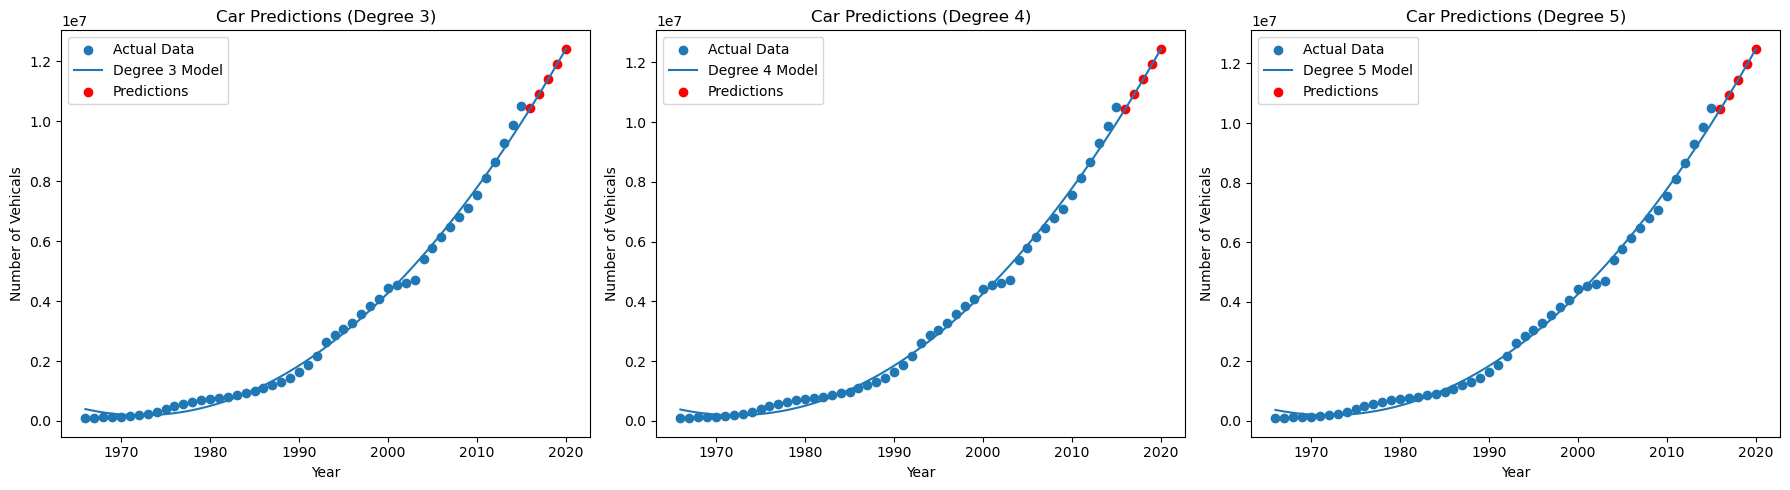

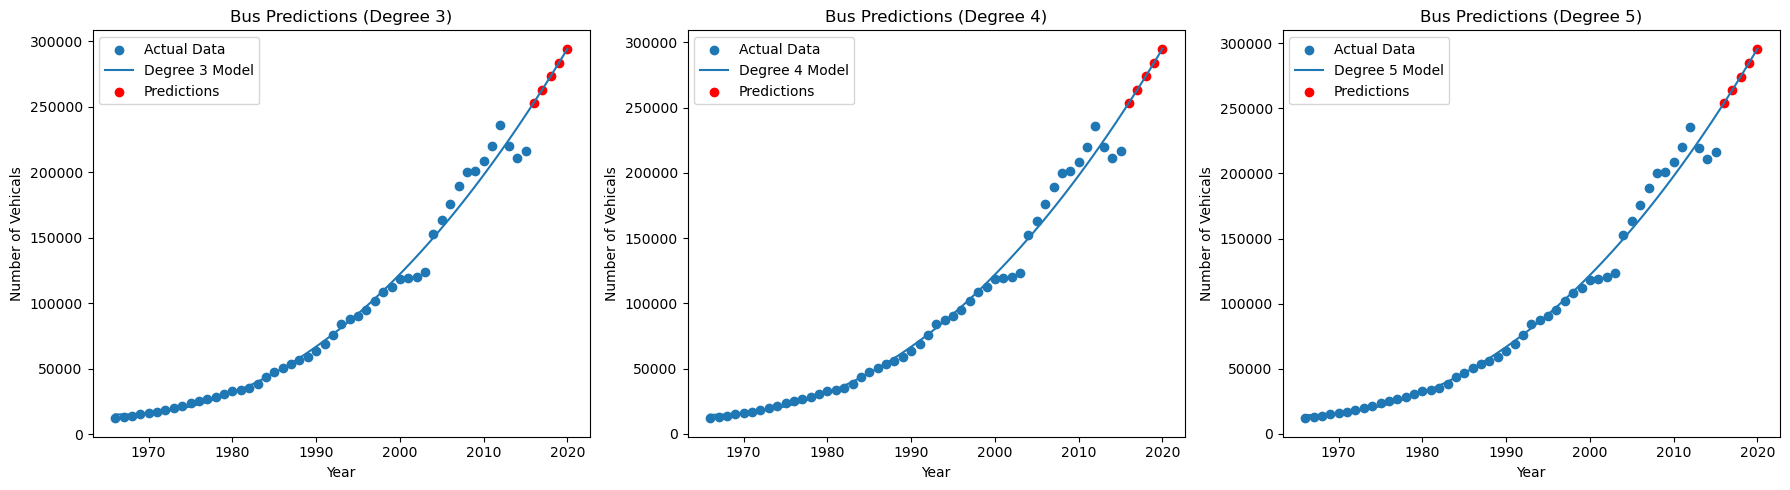

Car_Degree_3  Car_Degree_4  Car_Degree_5   Bus_Degree_3   Bus_Degree_4  \
Year                                                                           
2016  1.042535e+07  1.044551e+07  1.046531e+07  253245.948524  253569.307353   
2017  1.090439e+07  1.092913e+07  1.095347e+07  263195.421136  263597.283659   
2018  1.139463e+07  1.142438e+07  1.145368e+07  273353.355346  273841.462666   
2019  1.189609e+07  1.193129e+07  1.196601e+07  283720.046578  284302.443730   
2020  1.240877e+07  1.244989e+07  1.249050e+07  294295.790252  294980.826787   

       Bus_Degree_5  
Year                 
2016  253883.485240  
2017  263988.555394  
2018  274317.535496  
2019  284871.337044  
2020  295650.873284

In [360]:
# Code cell
def manual_polynomial(x, coefs):
    return sum(coef * (x**i) for i, coef in enumerate(coefs))


def fit_predict_plot(degree, years, values, prediction_years, title):
    
    X = np.vander(years, degree + 1,increasing=True)
    coefs, _, _, _ = lstsq(X, values, rcond=None)

    X_pred = np.vander(prediction_years, degree + 1, increasing=True)
    predictions = X_pred @ coefs

    p = Polynomial(coefs[::-1])
    x = np.linspace(years.min(), prediction_years.max(), 100)
    y = [manual_polynomial(xi, coefs) for xi in x]

    plt.scatter(years, values, label='Actual Data')
    plt.plot(x, y, label=f'Degree {degree} Model')
    plt.scatter(prediction_years, predictions, label='Predictions', color='red')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of Vehicals')
    plt.legend()

    return predictions

linalg_predictions = {}

# Plotting predictions for Cars
plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees, 1):
    plt.subplot(1, len(degrees), i)
    linalg_predictions[f'Car_Degree_{degree}'] = fit_predict_plot(degree, years, cars, prediction_years,f'Car Predictions (Degree {degree})')
plt.tight_layout()
plt.show()

# Plotting predictions for Buses
plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees, 1):
    plt.subplot(1, len(degrees), i)
    linalg_predictions[f'Bus_Degree_{degree}'] = fit_predict_plot(degree, years, buses, prediction_years, f'Bus Predictions (Degree {degree})')
plt.tight_layout()
plt.show()

# display predictions 
linalg_prediction_df = pd.DataFrame(linalg_predictions, index=prediction_years)
linalg_prediction_df.index.name = 'Year'
linalg_prediction_df


## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [361]:
def load_data(file_name):
    X = np.loadtxt(file_name, delimiter=',')
    return X

data = load_data('Image.csv')

    

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [362]:
def kmeans(X, K, max_iters=100):

    centroids = X[np.random.choice(X.shape[0], K, replace=False), :] # M
    U = np.zeros((X.shape[0], K))
    
    for i in range(max_iters):
        for j in range(X.shape[0]):
            distances = np.linalg.norm(X[j] - centroids, axis=1)
            min_dist_index = np.argmin(distances)
            U[j] = np.eye(K)[min_dist_index]

        new_centroids = np.zeros((K, X.shape[1]))
        for k in range(K):
            if U[:, k].sum() > 0:
                new_centroids[k] = np.mean(X[U[:, k] == 1], axis=0)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, U


- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [377]:
import matplotlib.pyplot as plt

def plot_clusters(X, M, U):
    plt.figure(figsize=(7,5))
    K = M.shape[0]

    cluster_colors = plt.cm.rainbow(np.linspace(0, 1, K))
    
    # Plot the data points, color-coded by cluster assignment
    for k in range(K):
        cluster_data = X[U[:, k] == 1]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=cluster_colors[k], label=f'Cluster {k+1}')
        
    
    # Plot the centroids
    for i, centroid in enumerate(M):
        plt.scatter(centroid[0], centroid[1], color='black', marker='x', s=100, lw=3)
        cluster_radius = np.linalg.norm(X[U[:, i] == 1] - M[i], axis=1).max()
        circle = plt.Circle((M[i, 0], M[i, 1]), cluster_radius, color='black', fill=False, linestyle='dashed')
        plt.gcf().gca().add_artist(circle)
    
    plt.xlim([-6,7])
    plt.ylim([-4,8])
    plt.title('Cluster Plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

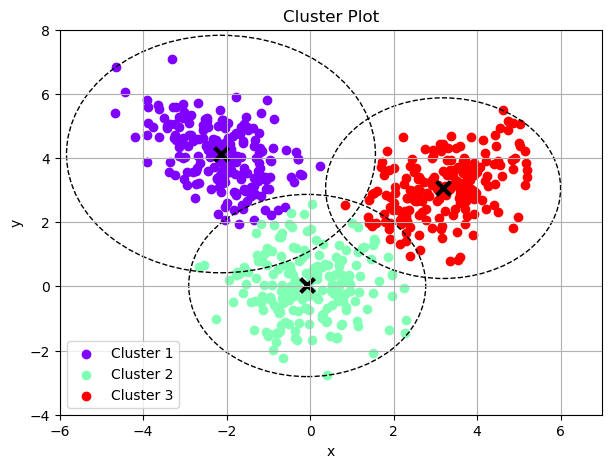

In [378]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

If the clustering of the data is spherical and has similar density, it works well, but if this is not the case, it may encounter problems.

**Advantages:** It is comprehensible and computationally efficient, and converges relatively quickly. It can effectively manage large datasets.

**Disadvantages:** The final result may depend on the initial choice of cluster centers. Different initializations can lead to different outcomes. It assumes that clusters are spherical and of the same size, which may not always reflect real-world scenarios. Outliers can significantly affect performance. The number of clusters must be predetermined.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

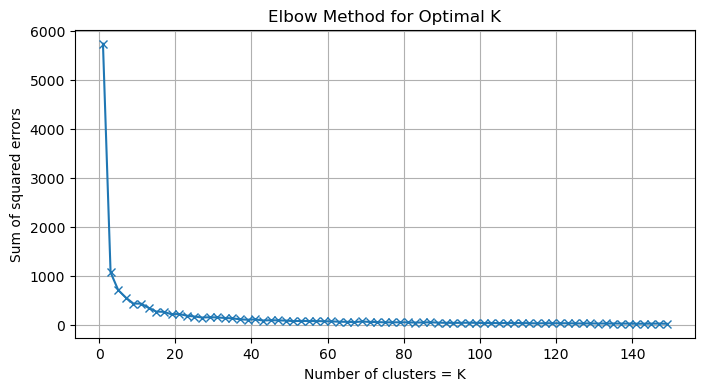

S =  [5744.40265041 1070.76158904  709.95199753  556.79576056  432.62890565
  432.51146296  344.44745712  269.91568218  263.87102588  214.15083086
  219.90366747  185.8634209   168.33082529  147.8768673   153.93513346
  150.08221854  138.95612206  131.27854428  111.31397331  102.64080327
  110.53696319   86.88814768   93.11558232   89.78178986   84.91713742
   74.8754702    78.7376727    75.80810521   76.36446382   71.64287927
   68.48230248   62.22574244   59.88234364   53.95212007   66.71438784
   58.11134374   54.89347987   49.42897181   50.20684128   49.9552019
   49.2194762    44.88550294   47.12127506   51.34653255   42.43268693
   39.99670137   38.45904341   39.57438924   41.56851459   39.53528575
   34.20834271   36.11831839   33.00967553   35.60142071   35.40449302
   34.52680696   32.41435615   27.83997189   32.06014559   30.43970732
   31.11509677   30.6040182    27.81824526   26.96048356   28.88533674
   24.5232533    26.94906827   25.58495856   24.69544639   24.57371053
  

In [382]:
def elbow_method(X, K_list):
    sse_list = []

    for k in K_list:
        _ , U = kmeans(X, k)
        centroids = np.dot(U.T, X) / np.sum(U, axis=0)[:, np.newaxis]
        sse = np.sum((X - centroids[U.argmax(axis=1)])**2)
        sse_list.append(sse)
    
    S = np.array(sse_list)
    
    # Plot the SSEs for each K
    plt.figure(figsize=(8, 4))
    plt.plot(K_list, S, marker='x')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters = K')
    plt.ylabel('Sum of squared errors')
    plt.grid(True)
    plt.show()
    
    return S

K_values =  range(1, 150, 2)
S = elbow_method(X, K_values)
print("S = ",S)


Looking at the plot, the SSE sharply decreases as the number of clusters increases from 1 to around 10, and after that, the decrease in SSE slows down significantly, indicating that additional clusters do not contribute significantly to explaining variance. The "elbow" of the plot — the point after which the SSE decrease becomes more gradual — appears to be around **10**. Therefore, it would be reasonable to choose 10 as the optimal number of clusters for this dataset, given that increasing the number of clusters beyond this point does not result in significant gains in explained variance.

To formally define the number of clusters based on the elbow method, you can look for the point where the rate of decrease sharply changes, which could be done using a derivative or looking for the "knee" in the curve, which is a more subjective method. In practice, it can also be beneficial to consider the context of the data and the cost of complexity when choosing the number of clusters.

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [241]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from collections import Counter


# nltk.download('punkt')
# nltk.download('stopwords')

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [242]:
# TODO: First 25 rows of the dataset

df = pd.read_csv('sentiment.csv')

print("First 25 rows:")
print(df.head(25))




First 25 rows:
    PhraseId  SentenceId                                             Phrase  \
0          1           1  A series of escapades demonstrating the adage ...   
1          2           1  A series of escapades demonstrating the adage ...   
2          3           1                                           A series   
3          4           1                                                  A   
4          5           1                                             series   
5          6           1  of escapades demonstrating the adage that what...   
6          7           1                                                 of   
7          8           1  escapades demonstrating the adage that what is...   
8          9           1                                          escapades   
9         10           1  demonstrating the adage that what is good for ...   
10        11           1                            demonstrating the adage   
11        12           1             

In [243]:
# TODO: Last 10 rows of the dataset

print("\nLast 10 rows:")
print(df.tail(10))


Last 10 rows:
      PhraseId  SentenceId                                             Phrase  \
9990      9991         419                     this a comedy or serious drama   
9991      9992         419                          a comedy or serious drama   
9992      9993         419                                        a comedy or   
9993      9994         419                                           a comedy   
9994      9995         419                                      serious drama   
9995      9996         420  plays like some corny television production fr...   
9996      9997         420                   plays like some corny television   
9997      9998         420                         like some corny television   
9998      9999         420                              some corny television   
9999     10000         420                                   corny television   

      Sentiment  
9990          2  
9991          2  
9992          2  
9993          2  
999

In [244]:
# TODO: information of columns 

print("\nInformation about all columns:")
print(df.info())


Information about all columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


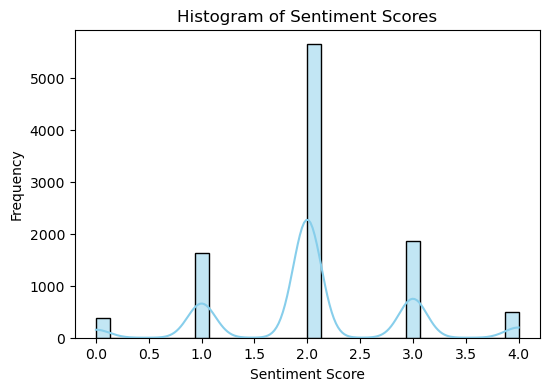

In [245]:
# TODO: histogram of sentiment scores

plt.figure(figsize=(6, 4))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [246]:
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
 
    stop_words = set(stopwords.words('english'))

    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text

# Example usage
example_text = "This is an example! Let's see how it works."
preprocessed_text = preprocess_text(example_text)
preprocessed_text


'example lets see works'

In [247]:
# TODO: Apply the preprocessing function to the text column

    
df['Phrase'] = df['Phrase'].apply(preprocess_text)

print("\nLast 10 rows:")
print(df.tail(10))



Last 10 rows:
      PhraseId  SentenceId                                             Phrase  \
9990      9991         419                               comedy serious drama   
9991      9992         419                               comedy serious drama   
9992      9993         419                                             comedy   
9993      9994         419                                             comedy   
9994      9995         419                                      serious drama   
9995      9996         420  plays like corny television production bygone era   
9996      9997         420                        plays like corny television   
9997      9998         420                              like corny television   
9998      9999         420                                   corny television   
9999     10000         420                                   corny television   

      Sentiment  
9990          2  
9991          2  
9992          2  
9993          2  
999

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

...

The **Bag-of-Words (BoW)** technique is a fundamental method in natural language processing and text analysis. It involves converting text data into numerical features that can be used as input for machine learning models, especially for tasks like sentiment analysis, text classification, and document clustering.

### How Bag-of-Words Works
1. **Tokenization**: The text is divided into individual words or tokens.
2. **Vocabulary Creation**: A vocabulary of all unique words in the text corpus is created.
3. **Vectorization**: Each piece of text (such as a sentence or document) is represented as a vector. The length of this vector is equal to the size of the vocabulary.
4. **Feature Encoding**: Each element of the vector corresponds to a word in the vocabulary. The value in each element typically represents the frequency of the corresponding word in the text (frequency count). Alternatively, it can be binary (indicating the presence or absence of the word) or use other weighting schemes like TF-IDF (Term Frequency-Inverse Document Frequency).

### Implementation in Python
In Python, the BoW model can be implemented using libraries like `scikit-learn`. The `CountVectorizer` class in `scikit-learn` is commonly used for creating BoW vectors. It automatically handles tokenization and vectorization, creating a sparse matrix where each row corresponds to a document and each column to a word in the vocabulary.

In [248]:
# TODO: Extract features from the preprocessed text data

vectorizer = CountVectorizer(binary=True, tokenizer=nltk.word_tokenize)

X = vectorizer.fit_transform(df['Phrase'])
y = df['Sentiment']



/Users/nikoomoradi/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [249]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# TODO: Evaluate the model using mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"Mean Squared Error for test set = {mse_test: .3f}\nMean Squared Error for train set = {mse_train: .3f}")


Mean Squared Error for test set =  0.413
Mean Squared Error for train set =  0.187


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

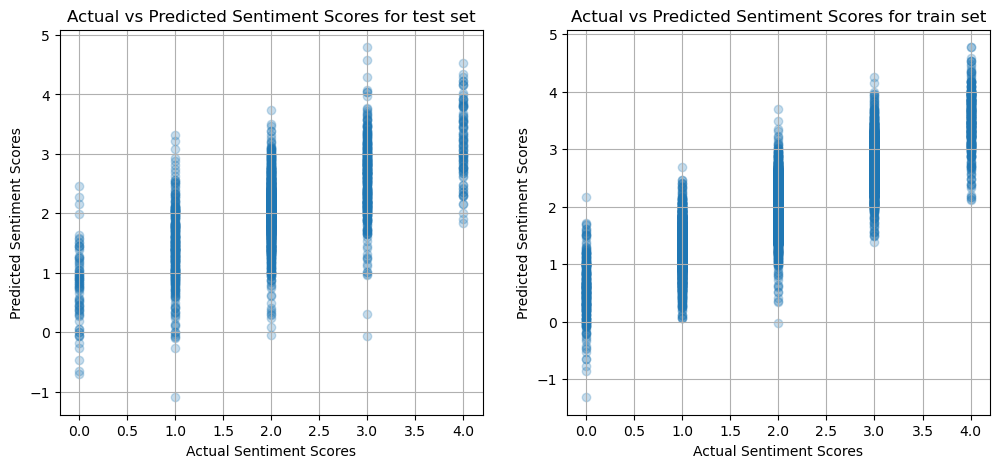

In [250]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(y_test, y_pred_test, alpha=0.25)
plt.title('Actual vs Predicted Sentiment Scores for test set')
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.grid(True)

plt.subplot(122)
plt.scatter(y_train, y_pred_train, alpha=0.25)
plt.title('Actual vs Predicted Sentiment Scores for train set')
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.grid(True)

plt.show()

## <font color="red"> Discuss the resulted figure </font>

...

### Test Set Scatter Plot Interpretation:

1.  **Spread of Predictions**: The predictions are spread across the range of actual sentiment scores, indicating the model does have some ability to distinguish between different levels of sentiment.

2.  **Concentration of Predictions**: There's a noticeable concentration of predicted values around the mid-range (neutral) sentiment. This could suggest that the model might be cautious and tends to predict neutral sentiments when it's uncertain.

3.  **Disparity in Extremes**: There are fewer predictions at the extremes (0 and 4), which might indicate the model is less confident or has less data to accurately predict strong sentiments.

### Training Set Scatter Plot Interpretation:

1.  **Close Fit**: A lower MSE on the training set (0.187) compared to the test set (0.413) indicates a closer fit to the training data.

2.  **Potential Overfitting**: While the difference in MSE is not drastic, it's common for models to perform better on the training set. However, the relatively close performance suggests that overfitting is not severe.

3.  **Balanced Distribution**: The distribution of predicted sentiments against actual sentiments is quite balanced, showing that the model has learned the training data well.

### Overall Interpretation:

*   **Model Generalization**: The model seems to generalize fairly well, though the increased error on the test set suggests there might be some overfitting or that the model has learned certain biases from the training data.

*   **Prediction Tendency**: The model's tendency to predict more neutral sentiments may be due to a larger number of neutral examples in the training data or the model's inability to capture the nuances in language that convey stronger sentiments.

*   **Model Improvement**: Enhancing the model could involve further feature engineering (like using n-grams or sentiment-specific word embeddings), collecting a more balanced dataset, or employing more complex models like neural networks which can capture context and subtleties in text data better.

*   **Evaluation Metrics**: In addition to MSE, classification metrics like accuracy, F1-score, and confusion matrix could provide more insight, especially since this is a multi-class classification problem masked as a regression problem.

The results suggest that while the model has learned to predict sentiments, there's potential for improvement, especially in confidently predicting strongly positive and negative sentiments.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [251]:
# TODO: Extract features from the preprocessed text data
# first using built-in functions:

vectorizer2 = CountVectorizer(binary=True, tokenizer=nltk.word_tokenize)

X2 = vectorizer2.fit_transform(df['Phrase'])
print("using built-in functions: \n",X2)

/Users/nikoomoradi/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


using built-in functions: 
   (0, 1905)	1
  (0, 682)	1
  (0, 532)	1
  (0, 46)	1
  (0, 902)	1
  (0, 910)	1
  (0, 77)	1
  (0, 869)	1
  (0, 1453)	1
  (0, 92)	1
  (0, 1432)	1
  (0, 91)	1
  (0, 1390)	1
  (0, 2059)	1
  (1, 1905)	1
  (1, 682)	1
  (1, 532)	1
  (1, 46)	1
  (1, 902)	1
  (1, 910)	1
  (2, 1905)	1
  (4, 1905)	1
  (5, 682)	1
  (5, 532)	1
  (5, 46)	1
  :	:
  (9991, 1906)	1
  (9991, 385)	1
  (9991, 594)	1
  (9992, 385)	1
  (9993, 385)	1
  (9994, 1906)	1
  (9994, 594)	1
  (9995, 1578)	1
  (9995, 1217)	1
  (9995, 272)	1
  (9995, 678)	1
  (9995, 447)	1
  (9995, 1647)	1
  (9995, 2157)	1
  (9996, 1578)	1
  (9996, 1217)	1
  (9996, 447)	1
  (9996, 2157)	1
  (9997, 1217)	1
  (9997, 447)	1
  (9997, 2157)	1
  (9998, 447)	1
  (9998, 2157)	1
  (9999, 447)	1
  (9999, 2157)	1


In [253]:
# Now implement and create the feature matrix from scratch.

# from collections import Counter

def tokenize(text):
    return text.split()

def create_vocabulary(df, column_name):
    vocabulary = set()

    for phrase in df[column_name]:
        tokens = tokenize(phrase)
        vocabulary.update(tokens)

    return sorted(vocabulary) 

def vectorize_text(text, vocabulary):
    tokens = tokenize(text)
    token_counts = Counter(tokens)
    vector = [1 if word in tokens else 0 for word in vocabulary]

    return vector

vocabulary = create_vocabulary(df, 'Phrase')

BoW = df['Phrase'].apply(lambda text: vectorize_text(text, vocabulary))

BoW_array = np.array(BoW.tolist())

X2_scratch = csr_matrix(BoW_array)
print("not using built-in functions: \n",X2_scratch)


not using built-in functions: 
   (0, 46)	1
  (0, 77)	1
  (0, 91)	1
  (0, 92)	1
  (0, 532)	1
  (0, 682)	1
  (0, 869)	1
  (0, 902)	1
  (0, 910)	1
  (0, 1390)	1
  (0, 1432)	1
  (0, 1453)	1
  (0, 1905)	1
  (0, 2059)	1
  (1, 46)	1
  (1, 532)	1
  (1, 682)	1
  (1, 902)	1
  (1, 910)	1
  (1, 1905)	1
  (2, 1905)	1
  (4, 1905)	1
  (5, 46)	1
  (5, 532)	1
  (5, 682)	1
  :	:
  (9991, 385)	1
  (9991, 594)	1
  (9991, 1906)	1
  (9992, 385)	1
  (9993, 385)	1
  (9994, 594)	1
  (9994, 1906)	1
  (9995, 272)	1
  (9995, 447)	1
  (9995, 678)	1
  (9995, 1217)	1
  (9995, 1578)	1
  (9995, 1647)	1
  (9995, 2157)	1
  (9996, 447)	1
  (9996, 1217)	1
  (9996, 1578)	1
  (9996, 2157)	1
  (9997, 447)	1
  (9997, 1217)	1
  (9997, 2157)	1
  (9998, 447)	1
  (9998, 2157)	1
  (9999, 447)	1
  (9999, 2157)	1
